# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do below things...
city_name_list=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lng_list=[]
max_temp_list=[]
wind_speed_list=[]

for city in(cities):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
          
        print(f"Processing Record : {city}")
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")


Beginning Data Retrieval 
-----------------------------
Processing Record : punta arenas
Processing Record : nikolskoye
Processing Record : qaanaaq
Processing Record : yellowknife
Processing Record : barrow
Processing Record : superior
Processing Record : laurel
Processing Record : tasiilaq
Processing Record : cidreira
Processing Record : sabha
Processing Record : khatanga
Processing Record : mataura
Processing Record : cherskiy
Processing Record : maragogi
Processing Record : arraial do cabo
Processing Record : kalmar
Processing Record : sao filipe
City not found. Skipping...
Processing Record : sayat
Processing Record : ushuaia
Processing Record : kruisfontein
City not found. Skipping...
Processing Record : hobart
Processing Record : naze
Processing Record : severo-kurilsk
Processing Record : deep river
Processing Record : huarmey
Processing Record : saskylakh
Processing Record : anchorage
Processing Record : sitka
Processing Record : lompoc
Processing Record : henties bay
Processing

Processing Record : souillac
Processing Record : klamath falls
Processing Record : ust-kan
Processing Record : alofi
Processing Record : nara
Processing Record : chuy
Processing Record : roma
Processing Record : ust-nera
Processing Record : bilma
Processing Record : katobu
Processing Record : tiassale
Processing Record : sheopur
Processing Record : honiara
City not found. Skipping...
Processing Record : airai
Processing Record : mezen
Processing Record : myingyan
Processing Record : zhigansk
Processing Record : padang
City not found. Skipping...
Processing Record : ustye
Processing Record : bandarbeyla
Processing Record : salalah
Processing Record : saint-louis
Processing Record : palaikastron
Processing Record : rorvik
Processing Record : goderich
Processing Record : trairi
Processing Record : oromocto
Processing Record : the valley
Processing Record : camacha
Processing Record : ambilobe
Processing Record : marathon
Processing Record : homer
Processing Record : denpasar
Processing Re

Processing Record : guilin
City not found. Skipping...
Processing Record : cozumel
Processing Record : puerto ayacucho
Processing Record : durango
City not found. Skipping...
Processing Record : sakakah
Processing Record : talnakh
Processing Record : poltavka
Processing Record : komsomolskiy
Processing Record : peace river
Processing Record : tyup
Processing Record : eureka
Processing Record : gasa
Processing Record : pemangkat
Processing Record : los llanos de aridane
Processing Record : tiksi
Processing Record : cameron park
Processing Record : fort nelson
Processing Record : am timan
Processing Record : nhulunbuy
Processing Record : den helder
Processing Record : ahuimanu
Processing Record : martapura
Processing Record : west bay
City not found. Skipping...
Processing Record : aska
Processing Record : deputatskiy
Processing Record : lavumisa
Processing Record : vardo
Processing Record : terra santa
Processing Record : cap malheureux
Processing Record : grand gaube
Processing Record 

In [4]:
# Create a panda data frame using data retrieve
city_df = ({'City': city_name_list, 'Cloudiness': cloudiness_list, 'Date': date_list,
                            'Humidity': humidity_list, 'Lat': lat_list, 'Lng': lng_list,'Max Temp': max_temp_list,'country': country_list , 'Windspeed': wind_speed_list})
weather_df = pd.DataFrame(city_df) 
weather_df

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,country,Windspeed
0,Punta Arenas,8,1624330851,86,-53.1500,-70.9167,33.12,CL,7.61
1,Nikolskoye,7,1624330852,78,59.7035,30.7861,75.79,RU,4.59
2,Qaanaaq,20,1624330852,71,77.4840,-69.3632,36.00,GL,7.11
3,Yellowknife,92,1624330852,42,62.4560,-114.3525,62.71,CA,2.28
4,Barrow,1,1624330853,65,71.2906,-156.7887,41.02,US,8.05
...,...,...,...,...,...,...,...,...,...
560,Kattivākkam,100,1624331064,54,13.2167,80.3167,84.29,IN,11.63
561,Flin Flon,47,1624331064,56,54.7682,-101.8650,51.17,CA,5.41
562,Coolidge,1,1624331064,16,32.9778,-111.5176,103.12,US,6.91
563,Claveria,91,1624331065,59,18.6074,121.0832,90.28,PH,8.68


In [5]:
# Save city data into a csv file
weather_df.to_csv("../output_data/CitiesA.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
count,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000
mean,58.364602,1.624331e+09,70.658407,20.503776,14.602750,67.644177,7.112602
std,38.726008,7.923137e+01,20.820708,33.430329,89.310367,13.751335,5.052165
min,0.000000,1.624331e+09,6.000000,-54.800000,-175.200000,32.230000,0.000000
25%,18.000000,1.624331e+09,61.000000,-6.231700,-65.133300,56.930000,3.130000
50%,70.000000,1.624331e+09,75.000000,22.504700,19.234500,70.020000,5.880000
75%,98.000000,1.624331e+09,87.000000,49.922600,87.733300,79.410000,10.450000
max,100.000000,1.624331e+09,100.000000,78.218600,179.316700,103.120000,28.990000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

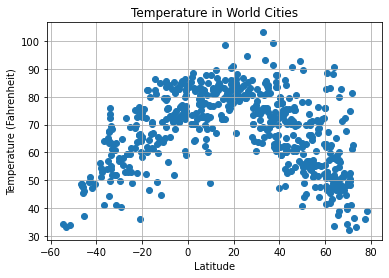

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

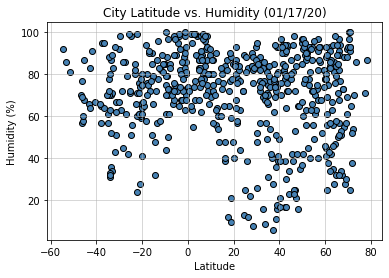

In [8]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

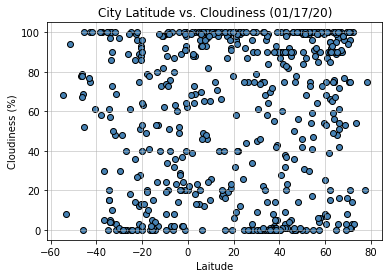

In [9]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

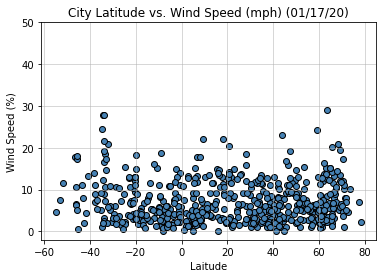

In [10]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Windspeed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.65


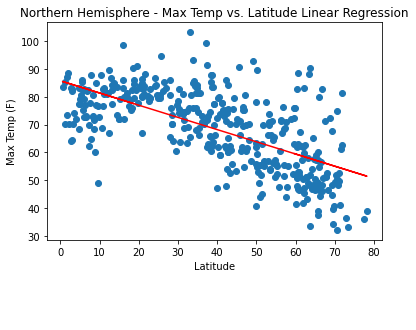

In [12]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.73


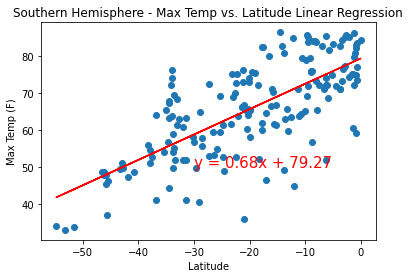

In [13]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.1


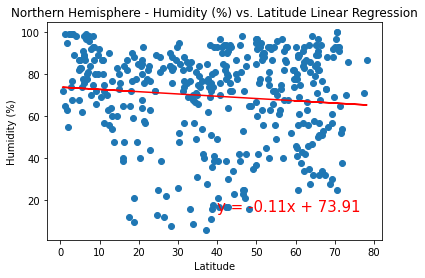

In [14]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.22


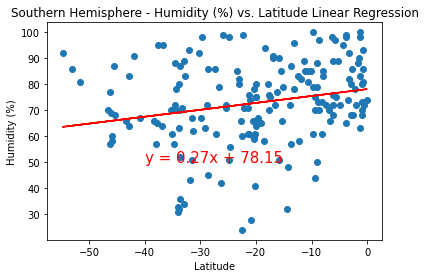

In [15]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.03


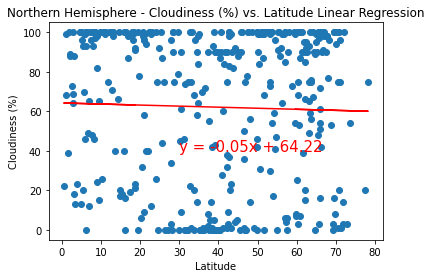

In [16]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.05


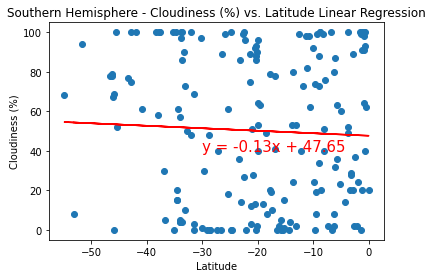

In [17]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.07


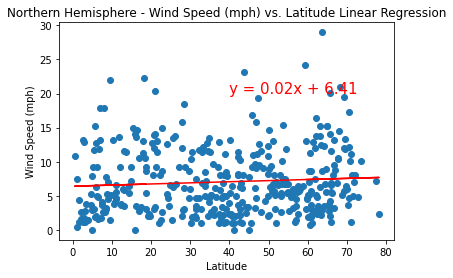

In [18]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Windspeed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.3


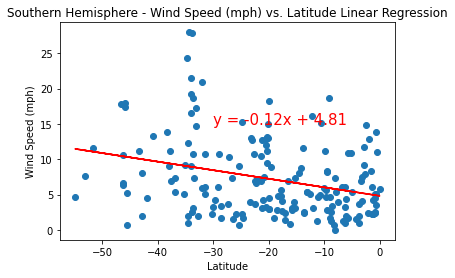

In [19]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Windspeed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")